# VGG Net 만들기

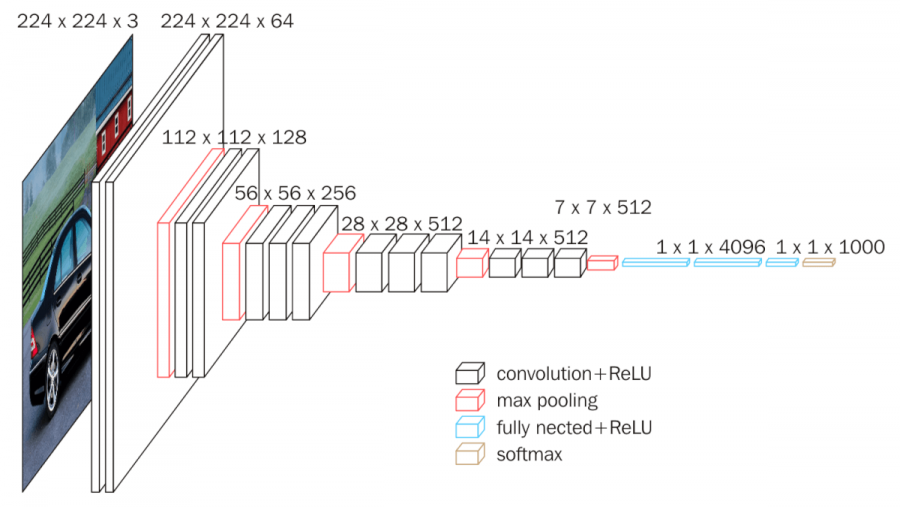

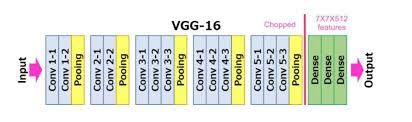

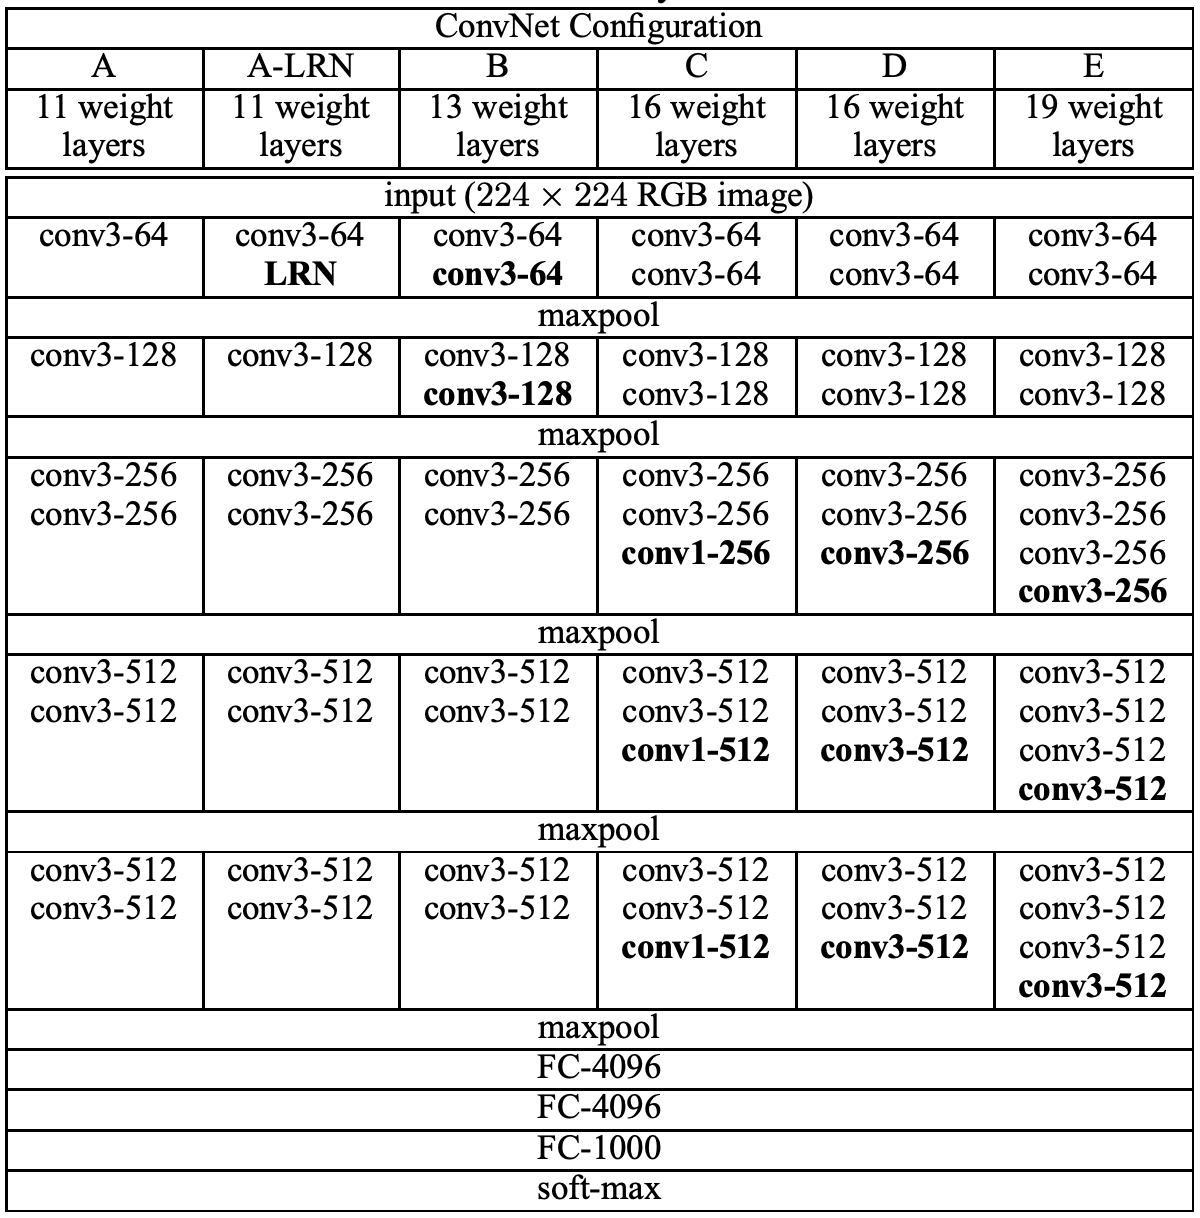

개발자가 하나의 버전이 아니라 A~E까지 여러개의 버전을 내놓음

## D버전

In [1]:
import torch
from torch import nn

class VGG16(nn.Module):
    def __init__(self, num_classes):
        super(VGG16, self).__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3,
                      out_channels=64,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      # (1(32-1)- 32 + 3)/2 = 1
                      padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64,
                      out_channels=64,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64,
                      out_channels=128,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128,
                      out_channels=128,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )
        
        self.block_3 = nn.Sequential(
            nn.Conv2d(in_channels=128,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_4 = nn.Sequential(
            nn.Conv2d(in_channels=256,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_5 = nn.Sequential(
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(True),
            nn.Dropout(p=0.65),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(p=0.65),
            nn.Linear(4096, num_classes),
        )

        # self.avgpool = nn.AdaptiveAvgPool2d((7, 7))

    def forward(self, x):

        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.block_5(x)
        # x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        logits = self.classifier(x)
        return logits

## A버전

In [2]:
import torch
from torch import nn

class VGG11(nn.Module):
    def __init__(self, num_classes):
        super(VGG11, self).__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3,
                      out_channels=64,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      # (1(32-1)- 32 + 3)/2 = 1
                      padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64,
                      out_channels=128,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )
        
        self.block_3 = nn.Sequential(
            nn.Conv2d(in_channels=128,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_4 = nn.Sequential(
            nn.Conv2d(in_channels=256,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_5 = nn.Sequential(
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(True),
            nn.Dropout(p=0.65),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(p=0.65),
            nn.Linear(4096, num_classes),
        )

        # self.avgpool = nn.AdaptiveAvgPool2d((7, 7))

    def forward(self, x):

        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.block_5(x)
        # x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        logits = self.classifier(x)
        return logits

## E버전

size : 600M (alexnet의 2배) - 근데 그만큼 성능은 더 좋음

In [3]:
import torch
from torch import nn

class VGG19(nn.Module):
    def __init__(self, num_classes):
        super(VGG19, self).__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3,
                      out_channels=64,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      # (1(32-1)- 32 + 3)/2 = 1
                      padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64,
                      out_channels=64,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64,
                      out_channels=128,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128,
                      out_channels=128,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )
        
        self.block_3 = nn.Sequential(
            nn.Conv2d(in_channels=128,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_4 = nn.Sequential(
            nn.Conv2d(in_channels=256,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_5 = nn.Sequential(
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(True),
            nn.Dropout(p=0.65),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(p=0.65),
            nn.Linear(4096, num_classes),
        )

        # self.avgpool = nn.AdaptiveAvgPool2d((7, 7))

    def forward(self, x):

        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.block_5(x)
        # x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        logits = self.classifier(x)
        return logits

In [4]:
sample_in = torch.randn(1,3,224,224)
print(sample_in.shape)

#vgg16 = VGG16(1000)
#vgg16_outputs = vgg16(sample_in)
#print(vgg_16_outputs.shape)

torch.Size([1, 3, 224, 224])


In [9]:
vgg11 = VGG11(10)
vgg_11_outputs = vgg11(sample_in)
print(vgg_11_outputs.shape)

torch.Size([1, 10])


In [10]:
#vgg_11_outputs.detach().numpy()
vgg_11_outputs.softmax(dim=1) #각 class일 확률

tensor([[0.1279, 0.0673, 0.0968, 0.0966, 0.0909, 0.1072, 0.1530, 0.0747, 0.0543,
         0.1311]], grad_fn=<SoftmaxBackward>)

In [12]:
#모델이 얼마나 잘못 예측했는지
nn.CrossEntropyLoss()(vgg_11_outputs, torch.tensor([0]))

tensor(2.0565, grad_fn=<NllLossBackward>)